# Week 13 Lab
## Part 3 - Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Part A:
We were excused from completing Part A as the GPS portion of the code was not working correctly. Thus, we were not able to plot the time/position dependence of radiation data, temperature, and 2.5 PM concentration. However, in the future, we can work on debugging the GPS code or even use our phones for GPS. 

### Part B:
Plot histograms of the full data sets that show the distributions clearly. Calculate the mean and standard deviation of each type of data. Do each of these data sets look like they follow a normal distribution?

See the histograms and calculations below for the mean and standard deviation for each type of data. Most of the data sets seemed not to follow a normal distrubtion but rather a Gaussin or Poisson distribution. Some types of the data collected do not follow a normal distribution due to the fixed time period (5 minutes per location), small sample size, measurement errors, and the stochastic nature of radiation. 

In [2]:
data1 = pd.read_csv("Loc2_session1_group1_2024-04-12_15-53-01.csv")
data2 = pd.read_csv("Loc3_session1_group1_2024-04-12_16-01-14.csv")
data3 = pd.read_csv("Loc4_session1_group1_2024-04-12_16-12-05.csv")
meta_data = [data1, data2, data3]

Mean = 25.542372881355927 Standard Deviation = 2.1603674663753507


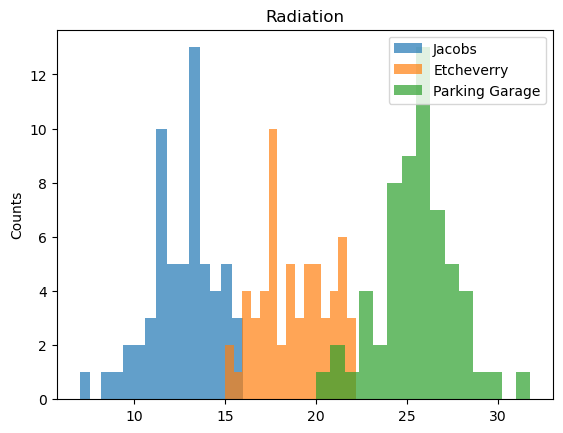

In [3]:
for data in meta_data:
    plt.hist(data["counts"], bins=15, alpha=0.7)
    plt.title("Radiation")
    plt.ylabel("Counts")
    plt.legend(["Jacobs", "Etcheverry", "Parking Garage"], loc="upper right")
    
print("Mean =", np.mean(data["counts"]), "Standard Deviation =", np.std(data["counts"]))

Mean = 20.93572199417373 Standard Deviation = 0.5526805442088629


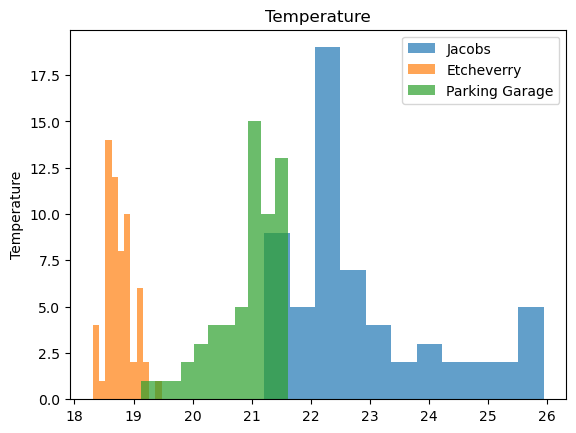

In [4]:
for data in meta_data:
    plt.hist(data["Temperature"], bins=11, alpha=0.7)
    plt.title("Temperature")
    plt.ylabel("Temperature")
    plt.legend(["Jacobs", "Etcheverry", "Parking Garage"], loc="upper right")
    
print("Mean =", np.mean(data["Temperature"]), "Standard Deviation =", np.std(data["Temperature"]))

Mean = 1.423728813559322 Standard Deviation = 0.5273338707153916


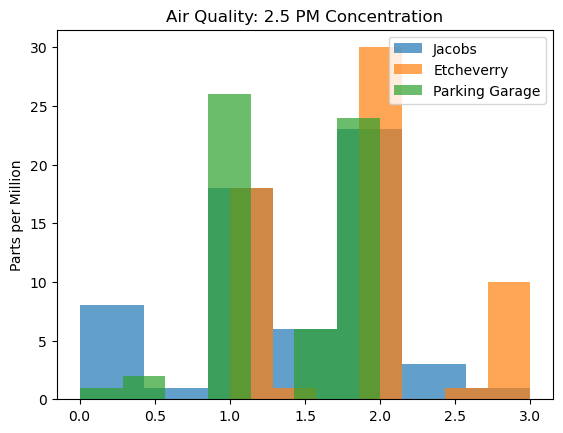

In [5]:
for data in meta_data:
    plt.hist(data["PM25"], bins=7, alpha=0.7)
    plt.title("Air Quality: 2.5 PM Concentration")
    plt.ylabel("Parts per Million")
    plt.legend(["Jacobs", "Etcheverry", "Parking Garage"], loc="upper right")
    
print("Mean =", np.mean(data["PM25"]), "Standard Deviation =", np.std(data["PM25"]))

### Part C:
You are primarily collecting radiation counts, which should follow counting statistics (σ = √N).
Using the mean of your full data set as an estimate of the expected number of counts, what
variation would you expect if the data was only varying because of counting statistics? How
does this compare to the measured standard deviation in your full data set? 

In [23]:
total_counts_per_location = []

for data in meta_data:
    total_counts_per_location.append(np.sum(data["counts"]))

total_counts = np.sum(total_counts_per_location)
print("Total Counts:", total_counts)

for data in meta_data:
    mean = np.mean(data["counts"])
    std = np.std(data["counts"])
print("Mean:", mean)
print("Measured Standard Deviation:", std)

uncertainty = np.sqrt(total_counts)
print("Uncertainty using Counting Statistics:", uncertainty)

Total Counts: 3394.4
Mean: 25.542372881355927
Measured Standard Deviation: 2.1603674663753507
Uncertainty using Counting Statistics: 58.261479555534805


The variation we would expect if the data was only varying due to counting statistics would be about 58 counts. This is much greater than the measured standard deviation in our full data set.

### Part D:
We learned from the central limit theorem that we can estimate the uncertainty on the mean and standard deviation of a distribution (and indeed, any properties of the distribution) based on how many times we sampled from that distribution.
* Note: You can test if your measured and expected variance are in statistical agreement by estimating the uncertainty on your measured standard deviation from the central limit theorem. 

In [40]:
# using provided formula

samples = [len(data1), len(data2), len(data3)]
N_samples = sum(samples)
N_samples_root = np.sqrt(N_samples)

std_uncertainty = uncertainty / np.sqrt(2 * N_samples_root)
print("Uncertainty on Measured Standard Deviation:", std_uncertainty)

Uncertainty on Measured Standard Deviation: 11.262978466722672


### Part E:
From your estimate of the expected variance, and the uncertainty on that estimate, did you see
more variation in the data than you would expect from simple counting statistics? What does
this imply about the sources of radiation contributing to your data?

#### Answer:
As shown through the calculations completed above, we saw more variation in the data than one would expect from simple counting statistics. This implies that there may have been background that contributed to the overall variability in the data by causing additional counts to appear in the measurements. This greater variation may also be due to variability in the efficiency of the detector as well as variability in the radiation sources we encountered. 

### Part F:
Using your estimated mean counts at the different locations and the uncertainty on those
means, how do the different locations compare? Do they have statistically different radiation
levels? Even if statistically significant, are the differences you see significant in a more general
sense (as in, leading to dose levels that would differ enough to matter for your health)?

In [47]:
total_counts_jacobs = np.sum(data1["counts"])
mean_jacobs = np.mean(data1["counts"])
std_jacobs = np.sqrt(total_counts_jacobs)
print("Jacbos:", "Mean:", mean_jacobs, "Std:", std_jacobs)

total_counts_etcheverry = np.sum(data2["counts"])
mean_etcheverry = np.mean(data2["counts"])
std_etcheverry = np.sqrt(total_counts_etcheverry)
print("Etcheverry:", "Mean:", mean_etcheverry, "Std:", std_etcheverry)

total_counts_garage = np.sum(data3["counts"])
mean_garage = np.mean(data3["counts"])
std_garage = np.sqrt(total_counts_garage)
print("Garage:", "Mean:", mean_garage, "Std:", std_garage)

Jacbos: Mean: 12.590000000000002 Std: 27.484541109503724
Etcheverry: Mean: 18.86666666666667 Std: 33.645207682521445
Garage: Mean: 25.542372881355927 Std: 38.82009788756334


#### Answer:
The parking garage should the highest number of counts followed by the backside of Etcheverry then outside of Jacobs. The counts varied more across the locations than we expected. However, the locations do not have statistically different radiation levels as the number of counts for each location are well within one sigma away from each other. It is more important to note, however, that in a more general sense areas with higher levels of radon gas and materials containing naturally radioactive elements such as the parking garage may possibly result in dose levels that would differ enough to matter for your health. For example, you may be exposured to higher dose levels if you inhale radon gas for a prolonged period of time from radioactive materials used to build cars and structures in the parking lot as opposed to outside of Jacobs in the fresh air. However, this scenario is very unlikely to occur and thus is not a major health concern for people. 